<a href="https://colab.research.google.com/github/dm-sap/dm-sap/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import matplotlib.pyplot as plt
import numpy as np    
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import math
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
def f1(E):
  x=0
  if 0.1<E and E<0.9 :
    x=1/E
  return x

def f2(E,mu,sigma):
  var=sigma**2
  return (1/(2*np.pi*var)**0.5)*np.e**(-(E-mu)**2/(2*var))

def f(E):
  a1=1
  a2=1.5
  return a1*f1(E)+a2*f2(E,1,0.01)

######################################

def g(E, sigma):
  var=sigma**2
  return (1/(2*np.pi*var)**0.5)*np.e**(-(E)**2/(2*var))

def convGAUS(E, E0, sigma):
  var=sigma*sigma
  return (f1(E)+1.5*f2(E,1,0.01))*(1/(2*np.pi*var)**0.5)*np.e**(-(E-E0)**2/(2*var))

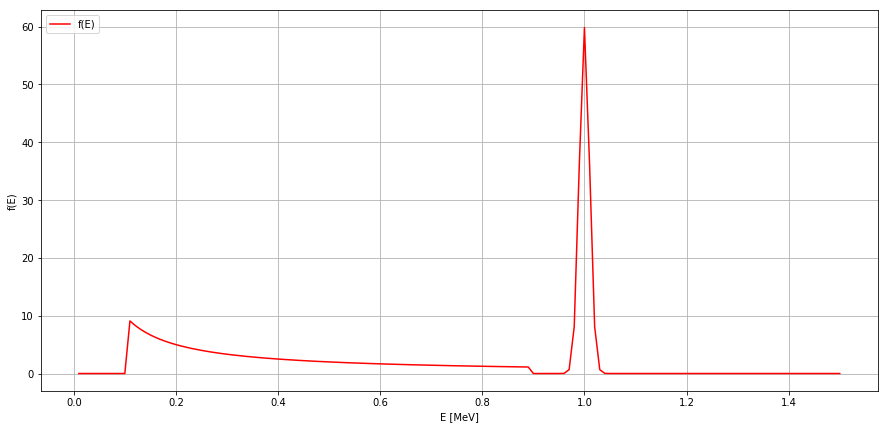

In [43]:
E=np.arange(0.01,1.51,0.01)
F=np.vectorize(f)
y=F(E)

####################################

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(E,y, label='f(E)', color= 'r')
ax.set_xlabel('E [MeV]')
ax.set_ylabel('f(E)')
ax.grid(True)
ax.legend(loc=2)

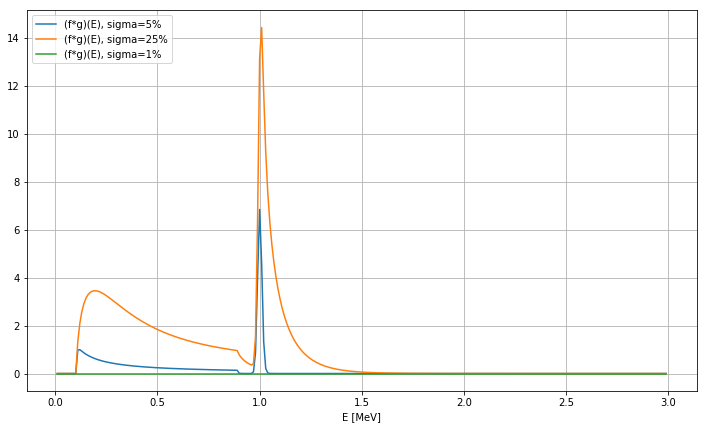

In [68]:
sigma1=0.05
sigma2=0.25
sigma3=0.01
####################################### Creazione array con i valori delle gaussiane a vari sigma
G=np.vectorize(g)
gaus1=G(E,sigma1*E**0.5)
gaus2=G(E,sigma2*E**0.5)
gaus3=G(E,sigma3*E**0.5)
####################################### Convoluzione con numpy.convolve()
con1=np.convolve(y,gaus1)
con2=np.convolve(y,gaus2)
con3=np.convolve(y,gaus3)
####################################### "Aggiustamento" dell'array di E per il plot
x=E
o=0.01
for i in range(0,len(con1)-len(E)):
  x=np.append(x,max(E)+o)
  o+=0.01

######################################

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x,con1*0.01, label='(f*g)(E), sigma=5%')
ax.plot(x,con2*0.01, label='(f*g)(E), sigma=25%')
ax.plot(x,con3*0.01, label='(f*g)(E), sigma=1%')
ax.set_xlabel('E [MeV]')
ax.grid(True)
ax.legend(loc=2)

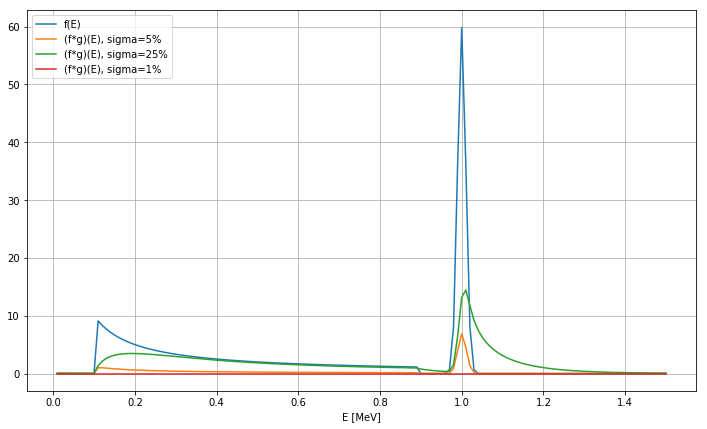

In [45]:
##################################### Convoluzione attraverso le Trasformate di Foutier con numpy.fft.fft() e antitrasformate con numpy.fft.ifft()
y_hat=np.fft.fft(y)

gaus1_hat=np.fft.fft(gaus1,norm='ortho')
T1_hat=y_hat*gaus1_hat
T1=np.fft.ifft(T1_hat,norm='ortho')

gaus2_hat=np.fft.fft(gaus2,norm='ortho')
T2_hat=y_hat*gaus2_hat
T2=np.fft.ifft(T2_hat,norm='ortho')

gaus3_hat=np.fft.fft(gaus3,norm='ortho')
T3_hat=y_hat*gaus3_hat
T3=np.fft.ifft(T3_hat,norm='ortho')

###############################################

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(E,y, label='f(E)')
ax.plot(E,T1*0.01, label='(f*g)(E), sigma=5%')
ax.plot(E,T2*0.01, label='(f*g)(E), sigma=25%')
ax.plot(E,T3*0.01, label='(f*g)(E), sigma=1%')
ax.set_xlabel('E [MeV]')
ax.grid(True)
ax.legend(loc=2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.


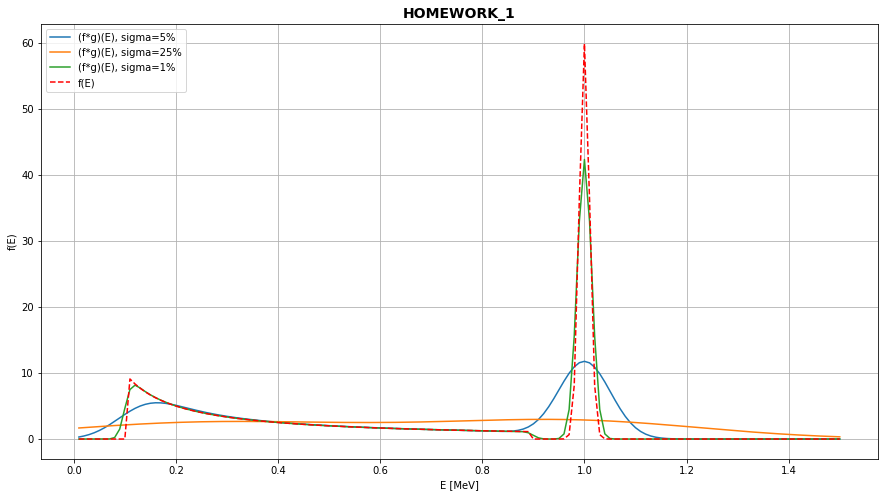

In [123]:
from scipy.integrate import quad
from matplotlib.pyplot import figure
figure(figsize=(15,8))
Conv1 =  []
Conv2 =  []
Conv3 =  []
Emin =  -np.inf
Emax =  np.inf
for i in range(0, len(E)):
  Conv1.append(quad(convGAUS, Emin, Emax, args=(E[i], sigma1))[0])
  Conv2.append(quad(convGAUS, Emin, Emax, args=(E[i], sigma2))[0])
  Conv3.append(quad(convGAUS, Emin, Emax, args=(E[i], sigma3))[0])

plt.plot(E,Conv1, label='(f*g)(E), sigma=5%')
plt.plot(E,Conv2, label='(f*g)(E), sigma=25%')
plt.plot(E,Conv3, label='(f*g)(E), sigma=1%')
plt.plot(E,y, label='f(E)', color= 'r', linestyle='--')
plt.title('HOMEWORK_1',fontsize=14,fontweight="bold")
plt.xlabel('E [MeV]')
plt.ylabel('f(E)')
plt.grid(True)
plt.legend(loc=2)
plt.savefig('/content/drive/MyDrive/Homework1.png', format='png',  dpi = 400, bbox_inches = 'tight', pad_inches = 0.2)